In [100]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import StratifiedKFold as KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree


datasetList = ['abalone.data', 'balance-scale.data', 'transfusion.data', 'australian.dat', 'car.data','breast-cancer-wisconsin.data','pop_failures.dat','german.data']
const_ks    = [1, 2, 3, 4, 5, 10, 20, 30, 50, 100, 255, 400]

# Dataset

### Abalone

In [62]:
dtName      = 'data/' + datasetList[0]
dtLabel     = datasetList[0]

df          = pd.read_csv(dtName, header=None)
X, y        = df.iloc[:,:-1].values, df.iloc[:, -1].values
enc         = OneHotEncoder(handle_unknown='ignore')
one_hot     = enc.fit_transform(X[:, 0, None])
one_hot_arr = one_hot.toarray()
X           = normalize(X[:, 1:])
X           = np.concatenate((one_hot_arr, X), axis=1)
corr_x      = np.corrcoef(X)
print(X.shape)
print(corr_x)
df.head()

(4177, 10)
[[ 1.          0.9648594  -0.09247761 ...  0.96146651 -0.11040126
   0.91951738]
 [ 0.9648594   1.         -0.11612443 ...  0.86190065 -0.17811506
   0.78973203]
 [-0.09247761 -0.11612443  1.         ... -0.1137173   0.9810195
  -0.10408575]
 ...
 [ 0.96146651  0.86190065 -0.1137173  ...  1.         -0.08250344
   0.99014047]
 [-0.11040126 -0.17811506  0.9810195  ... -0.08250344  1.
  -0.04863324]
 [ 0.91951738  0.78973203 -0.10408575 ...  0.99014047 -0.04863324
   1.        ]]


,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Transfusion

In [57]:
dtName      = 'data/' + datasetList[2]
dtLabel     = datasetList[2]

df          = pd.read_csv(dtName)
X, y        = df.iloc[:,:-1].values, df.iloc[:, -1].values
X           = normalize(X)
corr_x      = np.corrcoef(X)
print(X.shape)
print(corr_x)
df.head()

(748, 4)
[[1.         0.99999966 0.99999966 ... 0.99795436 0.98739345 0.94906298]
 [0.99999966 1.         0.99999998 ... 0.99799809 0.98743441 0.94914984]
 [0.99999966 0.99999998 1.         ... 0.99800393 0.9874638  0.94920777]
 ...
 [0.99795436 0.99799809 0.99800393 ... 1.         0.99329296 0.96313755]
 [0.98739345 0.98743441 0.9874638  ... 0.99329296 1.         0.98696177]
 [0.94906298 0.94914984 0.94920777 ... 0.96313755 0.98696177 1.        ]]


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


### Australian

In [ ]:
dtName      = 'data/' + datasetList[3]
dtLabel     = datasetList[3]

df          = pd.read_csv(dtName, header=None,delim_whitespace=True)
X, y        = df.iloc[:,:-1].values, df.iloc[:, -1].values
enc         = OneHotEncoder(handle_unknown='ignore')
one_hot     = enc.fit_transform(X[:, 0, None])
one_hot_arr = one_hot.toarray()
X           = normalize(X[:, 1:])
X           = np.concatenate((one_hot_arr, X), axis=1)
corr_x      = np.corrcoef(X)
print(X.shape)
print(corr_x)
df.head()

### Car

In [ ]:
dtName      = 'data/' + datasetList[4]
dtLabel     = datasetList[4]
df          = pd.read_csv(dtName, header=None)
number      = LabelEncoder()

for i in range(len(df.columns)):
    df[i]   = number.fit_transform(df[i].astype('str'))
    
X, y        = df.iloc[:,:-1].values, df.iloc[:, -1].values
enc         = OneHotEncoder(handle_unknown='ignore')
one_hot     = enc.fit_transform(X[:, 0, None])
one_hot_arr = one_hot.toarray()
X           = normalize(X[:, 1:])
X           = np.concatenate((one_hot_arr, X), axis=1)
corr_x      = np.corrcoef(X)
print(X.shape)
print(corr_x)
df.head()

### BreastOri

In [ ]:
dtName      = 'data/' + datasetList[5]
dtLabel     = datasetList[5]

df          = pd.read_csv(dtName)
X, y        = df.iloc[:,:-1].values, df.iloc[:, -1].values
y           = y[ np.all(X != '?', axis = 1)]
X           = X[ np.all(X != '?', axis = 1)].astype(np.float)
X           = normalize(X)
corr_x      = np.corrcoef(X)
print(X.shape)
print(corr_x)
df.head()

### Climate

In [ ]:
dtName      = 'data/' + datasetList[6]
dtLabel     = datasetList[6]

df          = pd.read_csv(dtName,delim_whitespace=True)
X, y        = df.iloc[:,:-1].values, df.iloc[:, -1].values
X           = normalize(X)
corr_x      = np.corrcoef(X)
print(X.shape)
print(corr_x)
df.head()


### German

In [ ]:
dtName      = 'data/' + datasetList[7]
dtLabel     = datasetList[7]

df          = pd.read_csv(dtName, header=None,delim_whitespace=True)
number      = LabelEncoder()

for i in range(len(df.columns)):
    df[i]   = number.fit_transform(df[i].astype('str'))
    
X, y        = df.iloc[:,:-1].values, df.iloc[:, -1].values
enc         = OneHotEncoder(handle_unknown='ignore')
one_hot     = enc.fit_transform(X[:, 0, None])
one_hot_arr = one_hot.toarray()
X           = normalize(X[:, 1:])
X           = np.concatenate((one_hot_arr, X), axis=1)
corr_x      = np.corrcoef(X)
print(corr_x)
df.head()

# KNN

In [56]:
print(dtLabel.split(".")[0])
print("K, Acurácia, Obs.")
for i in range(0, len(const_ks)):
    n_splits   = 5
    k          = const_ks[i]

    acc        = []
    acurancias = []
    train_time = []
    test_time  = []
    kf = KFold(n_splits=n_splits, random_state=42, shuffle=True)

    for train_index, test_index in (kf.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        neigh = KNeighborsClassifier(n_neighbors=k)
        #neigh = KNN(K=k, ktype=ktype)

        #Train
        start_time = time.time()
        neigh.fit(X_train, y_train)
        train_time.append( time.time() - start_time )

        #Test
        start_time = time.time()
        pred = neigh.predict(X_test)
        test_time.append( time.time() - start_time )

        acc.append( (pred == y_test).sum() / pred.shape[0] )

    acc = np.array(acc)
    print(f"{k:5}, {acc.mean():0.4f} +/- {acc.std():0.4f}")
    
    
clf = tree.DecisionTreeClassifier()
n_splits   = 5
k          = const_ks[i]

acc        = []
acurancias = []
train_time = []
test_time  = []
kf = KFold(n_splits=n_splits, random_state=42, shuffle=True)
th_value = 0.999
for train_index, test_index in (kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    corr_x_train    = np.corrcoef(X_train)
    corr_y_train    = ( corr_x_train > (corr_x_train.max() * th_value)).sum(axis=0)
    clf.fit(X_train, corr_y_train)
    corr_y_test     = clf.predict(X_test)
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X_train, y_train)

    sum_acc         = 0
    for idx, k in enumerate( np.unique(corr_y_test)):
        X_test_k = X_test[ corr_y_test == k]
        
        neigh.set_params(n_neighbors=k)
        
        #Test
        start_time = time.time()
        pred = neigh.predict(X_test_k)
        test_time.append( time.time() - start_time )
        
        sum_acc += (pred == y_test[corr_y_test == k]).sum()
        
    acc.append( sum_acc / len(corr_y_test))
acc = np.array(acc)
print(f"KTree, {acc.mean():0.4f} +/- {acc.std():0.4f}, TH: {th_value}")

FileNotFoundError: [Errno 2] File b'data/german.data' does not exist: b'data/german.data'

### K*tree

In [63]:
print(dtLabel)
for i in range(0, len(const_ks)):
    n_splits   = 5
    k          = const_ks[i]

    acc        = []
    acurancias = []
    train_time = []
    test_time  = []
    kf = KFold(n_splits=n_splits, random_state=42, shuffle=True)

    for train_index, test_index in (kf.split(X, y)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        neigh = KNeighborsClassifier(n_neighbors=k)
        #neigh = KNN(K=k, ktype=ktype)

        #Train
        start_time = time.time()
        neigh.fit(X_train, y_train)
        train_time.append( time.time() - start_time )

        #Test
        start_time = time.time()
        pred = neigh.predict(X_test)
        test_time.append( time.time() - start_time )

        acc.append( (pred == y_test).sum() / pred.shape[0] )

    acc = np.array(acc)
    print(f"{k:5}: Acc: {acc.mean():0.4f} +/- {acc.std():0.4f}")
    
    
clf = tree.DecisionTreeClassifier()
n_splits   = 5
k          = const_ks[i]

acc        = []
acurancias = []
train_time = []
test_time  = []
kf = KFold(n_splits=n_splits, random_state=42, shuffle=True)

for train_index, test_index in (kf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    corr_x_train    = np.corrcoef(X_train)
    corr_y_train    = ( corr_x_train > (corr_x_train.max() * 0.99)).sum(axis=0)
    clf.fit(X_train, corr_y_train)
    corr_y_test     = clf.predict(X_test)


    sum_acc         = 0
    for idx, k in enumerate( corr_y_test):
        neigh = KNeighborsClassifier(n_neighbors=k)
    
        #Train
        start_time = time.time()
        neigh.fit(X_train, y_train)
        train_time.append( time.time() - start_time )

        #Test
        start_time = time.time()
        pred = neigh.predict(X_test[idx, None])
        test_time.append( time.time() - start_time )
        sum_acc += (pred == y_test[idx]).sum()
        #acc.append( (pred == y_test[idx]).sum() )
       
    acc.append( sum_acc / len(corr_y_test))
acc = np.array(acc)
print(f"KTree: Acc: {acc.mean():0.4f} +/- {acc.std():0.4f}")

abalone.data


C:\Users\badro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


    1: Acc: 0.1949 +/- 0.0098


C:\Users\badro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


    2: Acc: 0.2096 +/- 0.0111


C:\Users\badro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


    3: Acc: 0.2046 +/- 0.0144


C:\Users\badro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


    4: Acc: 0.2134 +/- 0.0127


C:\Users\badro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


    5: Acc: 0.2138 +/- 0.0098


C:\Users\badro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


   10: Acc: 0.2351 +/- 0.0110


C:\Users\badro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


   20: Acc: 0.2438 +/- 0.0131


C:\Users\badro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


   30: Acc: 0.2551 +/- 0.0182


C:\Users\badro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


   50: Acc: 0.2591 +/- 0.0110


C:\Users\badro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  100: Acc: 0.2601 +/- 0.0210


C:\Users\badro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  255: Acc: 0.2488 +/- 0.0095


C:\Users\badro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


  400: Acc: 0.2461 +/- 0.0121


C:\Users\badro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


KTree: Acc: 0.2500 +/- 0.0111


### Graphics

In [52]:
def plot_bar(dataset,acc_knn,acc_ktree,acc_kstar):#simple bar plot, two bars to compare accuracy
    x = np.arange(3)
    labels = [acc_knn, acc_ktree, acc_kstar ]
    fig, ax = plt.subplots()
    plt.bar(x, labels,color=['blue', 'orange', 'red'])
    plt.xticks(x, ('Acc. kNN', 'Acc. Ktree', 'Acc. K*tree'))
    plt.ylabel('Accuracy')
    for i, v in enumerate(labels):
        plt.text(x[i]-0.05, v+0.001, str(v))
    plt.title('Accuracy comparison on ' +dataset+ ' dataset')
    plt.show()
    

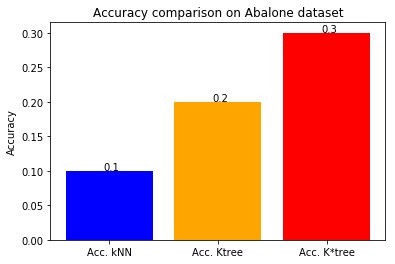

In [53]:
plot_bar('Abalone',.1,.2,.3)

In [95]:
def lines_plot(runtime_kNN, runtime_kTree, runtime_Kstar, iterations):
    x = np.arange(int(iterations))
    fig, ax = plt.subplots()
    line1, = ax.plot(x, runtime_kNN, '--' , label='kNN')

    line2, = ax.plot(x, runtime_kTree,'-.',label='Ktree')

    line3, = ax.plot(x,runtime_Kstar,'red', label='K*tree')

    ax.legend(loc='lower right')
    plt.ylabel('Runtime')
    plt.xlabel('Iterations')
    plt.show()

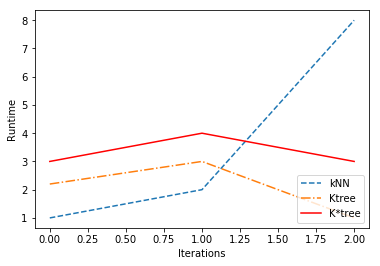

In [99]:
lines_plot([1.,2.,8.],[2.2,3.,1.],[3.,4.,3.],3)